<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [38]:
# Check for GPU
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [39]:
# Import pt
import torch as pt
from torch import nn

# Exercises require PyTorch > 1.10.0
print(pt.__version__)

# Setup device agnostic code
device = "cuda" if pt.cuda.is_available() else "cpu"
print(device)

2.0.1
cpu


## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Increase the size of the dataset
2. Increase the number of nodes and layer stacks
3. Decrease data augmentation
4. Increase the amount of training on the dataset

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [40]:
# 1. Get data


In [41]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [42]:
# Setup train and testing paths


In [43]:
# Visualize an image

In [44]:
# Do the image visualization with matplotlib


We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `pt.utils.data.Dataset` and later a `pt.utils.data.DataLoader`.

In [45]:
# 3.1 Transforming data with torchvision.transforms


In [46]:
# Write transform for turning images into tensors


In [47]:
# Write a function to plot transformed images


### Load image data using `ImageFolder`

In [48]:
# Create dataset
from pathlib import Path
import importLib
from sys import path
import zipfile


# Create directory
data_path = Path(f"{path[0]}/data")
image_path = data_path / 'pizza_steak_sushi'
if image_path.exists():
    print('Already exists')
else:
    image_path.mkdir(parents=True)


# Download pizza, steak and sushi data
# open skapar en zip fil som sedan fylls genom request
importLib.import_from_github('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip',directory=data_path)
with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip', 'r') as zip_ref:
    print('Unzipping pizza, steak and sushi data')
    zip_ref.extractall(image_path)
Path.unlink(data_path/'pizza_steak_sushi.zip')


Already exists
/Users/gustavgamstedt/Desktop/github to hemma/PyTorch/04/exercises/data/pizza_steak_sushi.zip doesn't exist, download
Unzipping pizza, steak and sushi data


In [49]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
# Use ImageFolder to create dataset(s)

train_path = image_path / 'train'
test_path = image_path / 'test'

to_dataset_transforms = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

train_data =  ImageFolder(
    root=train_path,
    transform=to_dataset_transforms)

test_data =  ImageFolder(
    root=test_path,
    transform=to_dataset_transforms)


In [50]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [51]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [52]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [53]:
# Turn train and test Datasets into DataLoaders
from os import cpu_count
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = round(cpu_count()*(3/4))
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12753a0d0>,
 <torch.utils.data.dataloader.DataLoader at 0x127fc2a10>)

In [54]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

In [55]:
next(iter(train_dataloader))

[tensor([[[[0.0549, 0.0627, 0.0706,  ..., 0.0196, 0.0118, 0.0118],
           [0.0314, 0.0392, 0.0431,  ..., 0.1373, 0.1255, 0.1098],
           [0.0157, 0.0157, 0.0157,  ..., 0.1725, 0.1765, 0.1725],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0039, 0.0157, 0.0353,  ..., 0.0000, 0.0000, 0.0000],
           [0.0157, 0.1294, 0.0902,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
           [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0314, 0.0314],
           [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.0588],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0118, 0.0235,  ..., 0.0000, 0.0000, 0.0000],
           [0.0118, 0.1137, 0.0745,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.0000, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0118],
           [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0078, 0.0118],
           [0.0039, 0.00

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [56]:
class TinyVGG(nn.Module):
    def __init__(self, input_features:int,output_features:int, hidden_units:int=10):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_features, hidden_units,
                      kernel_size=3, stride=1, padding=0),
            nn.ReLU(),


            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=0),
            nn.ReLU(),


            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*13*13, output_features)
        )
    def forward(self, X:pt.Tensor) -> pt.Tensor:
        X_change = self.conv_block_1(X)
        X_change = self.conv_block_2(X_change)
        # print(X_change.shape)
        X_change = self.classifier(X_change)
        return X_change

## 4. Create training and testing functions for `model_0`.

In [57]:
def train_step(model: pt.nn.Module,
               dataloader: pt.utils.data.DataLoader,
               loss_fn: pt.nn.Module,
               optimizer: pt.optim.Optimizer):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for X,y in dataloader:
    # Send data to target device
    X,y = X.to(device), y.to(device)
    # 1. Forward pass
    y_logits = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += pt.eq(pt.argmax(y_logits, dim=1),y).sum().item()/len(X)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()
  # Adjust metrics to get average loss and average accuracy per batch
  train_acc /= len(dataloader)
  train_loss /= len(dataloader)
  return train_loss, train_acc


In [58]:
def test_step(model: pt.nn.Module,dataloader: pt.utils.data.DataLoader,loss_fn: pt.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  model.eval()
  with pt.inference_mode():
    # Loop through DataLoader batches
    for X,y in dataloader:
      # Send data to target device
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      y_logits = model(X)

      # 2. Calculuate and accumulate loss
      test_loss += loss_fn(y_logits, y).item()

      # Calculate and accumulate accuracy
      test_acc += pt.eq(y, pt.argmax(y_logits, dim=1)).sum().item()/len(y_logits)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)

  return test_loss, test_acc

In [59]:
from tqdm.auto import tqdm

def train(model: pt.nn.Module,
          train_dataloader: pt.utils.data.DataLoader,
          test_dataloader: pt.utils.data.DataLoader,
          optimizer: pt.optim.Optimizer,
          loss_fn: pt.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `pt.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [ ]:
# Train for 5 epochs
pt.manual_seed(42)
pt.cuda.manual_seed(42)

EPOCHS = 5
LEARNING_RATE = 0.001

model_0 = TinyVGG(input_features=3, output_features=len(train_data.classes), hidden_units=10).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = pt.optim.Adam(params=model_0.parameters(),
                             lr=LEARNING_RATE)

In [ ]:
model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=EPOCHS
)


### Add results to Weights and biases proj

In [ ]:
try:
    import wandb
except ModuleNotFoundError:
    print('Module not found, installing module')
    !pip3 install wandb
    import wandb
wandb.login()

In [ ]:
def log_all(model_results: dict[str, int],lr:int,project:str, name:str=None, architecture:str=None, dataset:str = None):

    wandb.init(
        project=project,
        config={
            'learning rate':lr,
            'architecture': architecture,
            'dataset': dataset,
            'epochs':5,
        },
        name=name
    )
    for i,_ in enumerate(model_results['train_loss']):
      values_at_index = {key: values[i] for key, values in model_results.items()}
      wandb.log(values_at_index)
    wandb.finish()

In [ ]:
# Changeable
NAME = 'CNN 20, 5 epochs, 5 hidden units'
MODEL_RESULTS = model_0_results
# log_all(model_results=MODEL_RESULTS,lr=0.001,project='04_extras',name=NAME)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
pt.manual_seed(42)
pt.cuda.manual_seed(42)


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

In [ ]:
# See how many images we have
walk_through_dir(image_path)

Excellent, we now have double the training and testing images...

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_dataset_20p = ImageFolder(root=train_data_20_percent_path, transform=simple_transform)
test_dataset_20p = ImageFolder(root= test_data_20_percent_path, transform=simple_transform)

# Create dataloaders
train_dataloader_20p = DataLoader(dataset=train_dataset_20p, batch_size=32, shuffle=True)
test_dataloader_20p = DataLoader(dataset=test_dataset_20p, batch_size=32, shuffle=False)

In [ ]:
# Train a model with increased amount of data
EPOCHS = 20
HIDDEN_UNITS = 20
pt.manual_seed(42)
pt.cuda.manual_seed(42)
model_1 = TinyVGG(input_features=3, output_features=len(train_dataset_20p.classes), hidden_units=HIDDEN_UNITS).to(device)

loss_fn_20p = nn.CrossEntropyLoss()
optimizer_20p = pt.optim.Adam(params=model_1.parameters(),
                             lr=LEARNING_RATE)

model_1_results = train(model=model_1,
                        train_dataloader = train_dataloader_20p,
                        test_dataloader = test_dataloader_20p,
                        optimizer = optimizer_20p,
                        loss_fn = loss_fn_20p,
                        epochs = EPOCHS)

In [ ]:
# Changeable
NAME = 'CNN 20 procent, 20 epochs, 20 hidden units'
MODEL_RESULTS = model_1_results
log_all(model_results=MODEL_RESULTS,lr=0.001,project='04_extras',name=NAME)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [90]:
#! next load saved dict and make prediction runner
from torchvision import io, transforms
import torch as pt
import matplotlib.pyplot as plt
def make_prediction(root:str, model:pt.nn.Module, transform:transforms=None, device:pt.device='cpu', class_names:str=None):
    image = io.read_image(root).type(pt.float32)
    image /= 255.
    if transform:
        image = transform(image)
    model.to(device)
    model.eval()
    with pt.inference_mode():
        logits = model(image.to(device).unsqueeze(0))
    pred_probs = pt.softmax(logits, dim=1)
    pred = pt.argmax(logits, dim=1)

    plt.imshow(image.permute(1,2,0))
    title = f'Pred: {class_names[pred.cpu()]} | Prob: {pred_probs.max().cpu():.3f}' if class_names else f'Pred: {pred.cpu().item()} | Prob: {pred_probs.max().cpu():.3f}'
    plt.title(title)
    plt.axis(False)
    
    

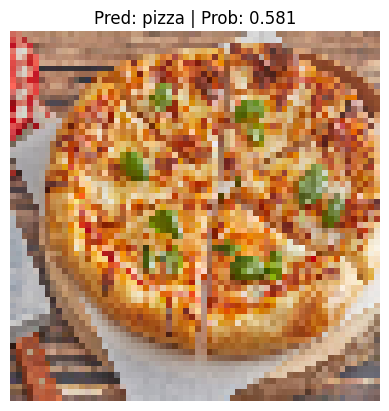

In [94]:
import ml_funcs
from sys import path

change_transform = transforms.Compose([transforms.Resize(size=(64,64), antialias = None)])

import ml_funcs
loaded_model = ml_funcs.save_load.load_state_dict(TinyVGG(3,len(test_data.classes),20),'model_1_20p')
# ml_funcs.save_load.save_state_dict(model_1, 'model_1_20p')
make_prediction(root = path[0]+'/pizza.jpeg', transform = change_transform, model=loaded_model, class_names=test_data.classes)